#Spectial Clustering 

1. Self-implementation and toy exmaple


2. Scikit Learn Compare K-means clustering and Spectral clustering 
3. Spectral Clustering for Image Segmentation 

tutorial 
https://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf


## Algorithm
The algorithm can be broken down into 6 basic steps

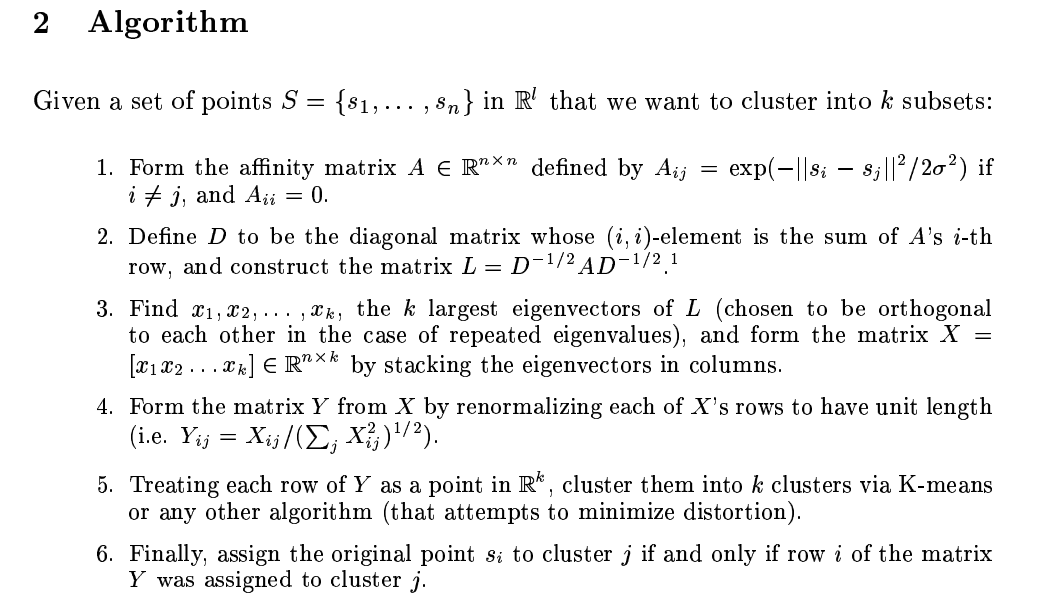




Reference: 


Ng, Andrew Y., Michael I. Jordan, and Yair Weiss. "On spectral clustering: Analysis and an algorithm." Advances in neural information processing systems 2 (2002): 849-856.

# Code

## toy example

### Generate and Visualize data

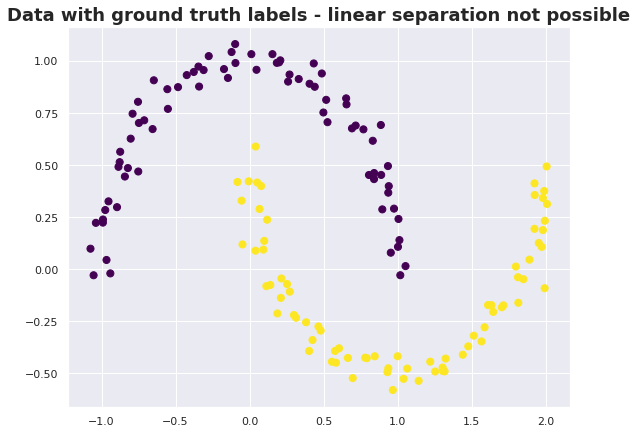

In [1]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import kneighbors_graph
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns

sns.set()
import time
import pandas as pd
import pandas_datareader.data as web
import scipy
%matplotlib inline
# %watermark
from sklearn.datasets import make_moons
random_state = 21
X_mn, y_mn = make_moons(150, noise=.05, random_state=random_state)
cmap = 'viridis'
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_mn,s=dot_size, cmap=cmap)

### Step 1: Caluclate Adjacency Matrix

In [2]:
# similarity matrix
gamma = 1.0
distance = pairwise_distances(X_mn, metric="euclidean")
A = np.exp(-gamma * distance / (2* 0.05)) 
# source: https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering and https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
np.fill_diagonal(A, 0)

### Step 2: Laplacian Matrix

In [3]:
from scipy.linalg import fractional_matrix_power
# degree matrix
D = np.diag(np.sum(A, axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = np.matmul(np.matmul(fractional_matrix_power(D, -0.5), A), fractional_matrix_power(D, -0.5))

degree matrix:
[[3.7079984  0.         0.         ... 0.         0.         0.        ]
 [0.         3.63422798 0.         ... 0.         0.         0.        ]
 [0.         0.         3.07770462 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 3.20854944 0.         0.        ]
 [0.         0.         0.         ... 0.         2.73885709 0.        ]
 [0.         0.         0.         ... 0.         0.         2.86743073]]


### Step 3: Calculate k-largest Eigenvector

In [4]:
# assume there are two clusters 
eigval, eigvec = scipy.linalg.eigh(L)
k = 2
n_nodes = L.shape[0]
X = eigvec[:, n_nodes-k:]

### Step 4 
Form matrix Y from X by renomalizing each of X's rows to have unit length

In [5]:
row_ssq = np.sqrt(np.sum(X**2, axis=1))
Y = X/row_ssq.reshape(-1, 1)

### Step 5 
Treatubg each row of Y as a point in $\mathrm{R}^k$, cluster them into $k$ clusters via K-means or any other algorithms. 

Here, we will use K-means clustering. 


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


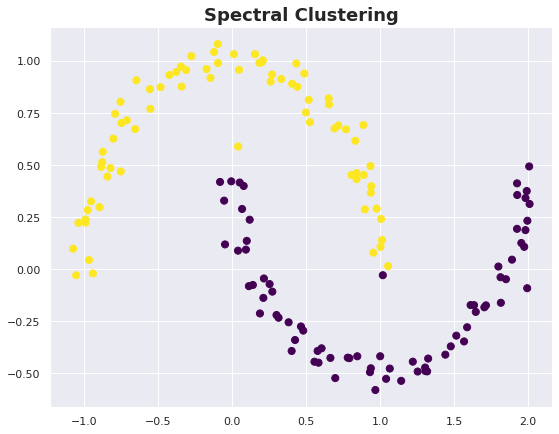

In [6]:
from sklearn.cluster import KMeans 
random_state = 170

y_pred = KMeans(n_clusters=2).fit_predict(Y)
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Spectral Clustering', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_pred,s=dot_size, cmap=cmap)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


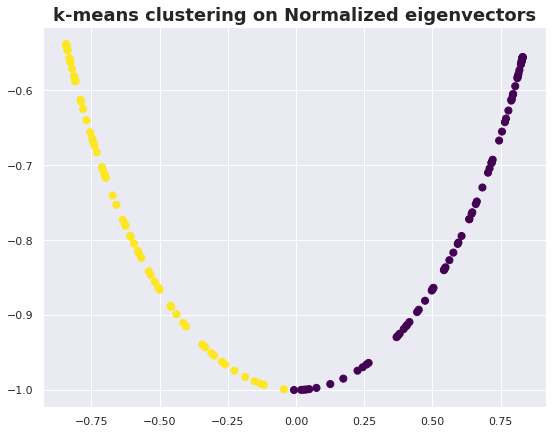

In [7]:
from sklearn.cluster import KMeans 
random_state = 170

y_pred = KMeans(n_clusters=2).fit_predict(Y)
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('k-means clustering on Normalized eigenvectors', fontsize=18, fontweight='demi')
ax.scatter(Y[:, 0], Y[:, 1],c=y_pred,s=dot_size, cmap=cmap)

## Compare Kmeans and Spectral Clustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


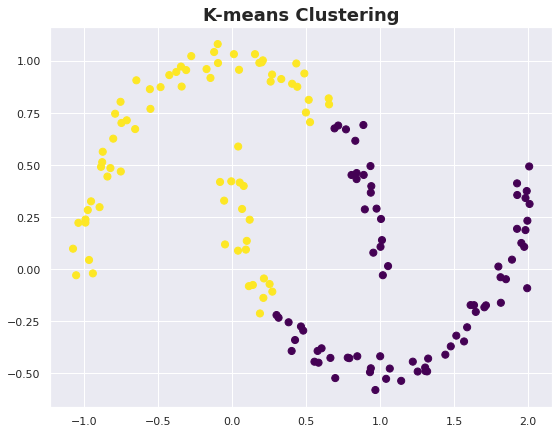

In [8]:
y_pred = KMeans(n_clusters=2).fit_predict(X_mn)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('K-means Clustering', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_pred,s=dot_size, cmap=cmap)

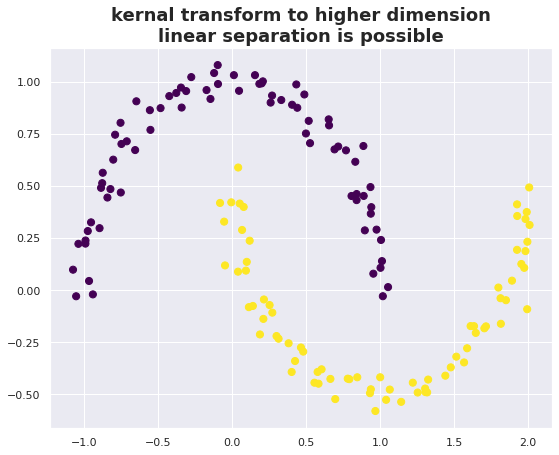

In [9]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labelsS = model.fit_predict(X_mn)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('kernal transform to higher dimension\nlinear separation is possible', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labelsS, s=dot_size, cmap=cmap)

## Exercise, How could you ustilize the code above to finish the class, SpectralClustering below? 

In [10]:
class SpectralClustering: 
    def __init__(self, num_clusters): 
        pass 
    
    def __calculate_Laplacian_Matrix__(self):
        pass
    def __calculate_k_largest_eigen_vector__(self):
        pass
    def __normalize_X__(self):
        pass
    def fit(self, X): 
        pass 


## Spectral clustering for image segmentation

In this example, an image with connected circles is generated and spectral clustering is used to separate the circles.

In these settings, the Spectral clustering approach solves the problem know as ‘normalized graph cuts’: the image is seen as a graph of connected voxels, and the spectral clustering algorithm amounts to choosing graph cuts defining regions while minimizing the ratio of the gradient along the cut, and the volume of the region.

As the algorithm tries to balance the volume (ie balance the region sizes), if we take circles with different sizes, the segmentation fails.

In addition, as there is no useful information in the intensity of the image, or its gradient, we choose to perform the spectral clustering on a graph that is only weakly informed by the gradient. This is close to performing a Voronoi partition of the graph.

In addition, we use the mask of the objects to restrict the graph to the outline of the objects. In this example, we are interested in separating the objects one from the other, and not from the background.




In [11]:
from sklearn.feature_extraction import image

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# #############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4


We use a mask that limits to the foreground: the problem that we are interested in here is not separating the objects from the background, but separating them one from the other.

In [12]:
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)


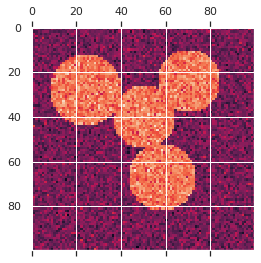

In [13]:
plt.matshow(img)

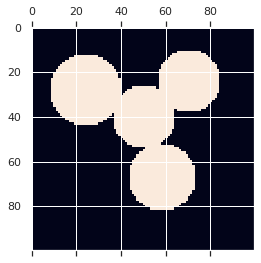

In [14]:
plt.matshow(mask)

Convert the image into a graph with the value of the gradient on the edges.

In [15]:

graph = image.img_to_graph(img, mask=mask)


Take a decreasing function of the gradient: we take it weakly dependent from the gradient the segmentation is close to a voronoi

In [16]:
graph.data = np.exp(-graph.data / graph.data.std())

Force the solver to be arpack, since amg is numerically unstable on this example

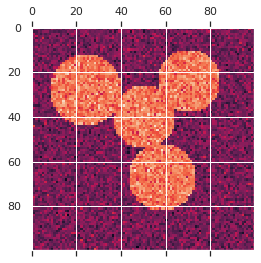

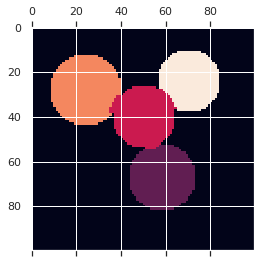

In [17]:

from sklearn.cluster import spectral_clustering

labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

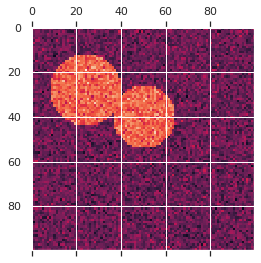

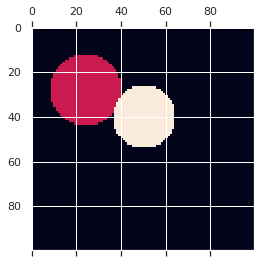

In [18]:
# #############################################################################
# 2 circles
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()